# Library Load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
  LabelEncoder,
  MinMaxScaler,
  OneHotEncoder,
  OrdinalEncoder,
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Load

In [ ]:
# Read all dataframes
folder = '/content/drive/MyDrive/Dibimbing/Take Home Test - Data Analyst/Dataset'
customer_info_df = pd.read_csv(f'{folder}/Customer_Info.csv')
location_df = pd.read_csv(f'{folder}/Location_Data.csv')
online_services_df = pd.read_csv(f'{folder}/Online_Services.csv')
payment_info_df = pd.read_csv(f'{folder}/Payment_Info.csv')
service_options_df = pd.read_csv(f'{folder}/Service_Options.csv')
status_analysis_df = pd.read_csv(f'{folder}/Status_Analysis.csv')

# Merge all dataframes on customer_id
df = customer_info_df.merge(location_df, on='customer_id')\
                    .merge(online_services_df, on='customer_id')\
                    .merge(payment_info_df, on='customer_id')\
                    .merge(service_options_df, on='customer_id')\
                    .merge(status_analysis_df, on='customer_id')

# Data Pre-Processing

In [ ]:
df.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,country,state,city,zip_code,total_population,latitude,longitude,phone_service_x,internet_service_x,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,internet_service_y,phone_service_y,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,9,Yes,Yes,No,16,Yes,NaN,Yes,2,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,Male,46,No,No,No,No,0,No,United States,California,Glendale,91206,31297,34.162515,-118.203869,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,9,Yes,Yes,Yes,10,No,NaN,No,0,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,Male,50,No,No,No,No,0,No,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,4,Yes,Yes,No,30,Yes,Offer E,No,0,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes,United States,California,Martinez,94553,46677,38.014457,-122.115432,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes,United States,California,Camarillo,93010,42853,34.227846,-119.079903,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,3,Yes,Yes,No,11,Yes,NaN,Yes,3,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


In [ ]:
df.sample(5)

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,country,state,city,zip_code,total_population,latitude,longitude,phone_service_x,internet_service_x,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,internet_service_y,phone_service_y,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
5474,7706-DZNKK,Male,63,No,No,No,No,0,No,United States,California,Palmdale,93551,34045,34.613476,-118.256358,Yes,No,No,No,No,No,No,No,No,NaN,Month-to-Month,Yes,Credit card (automatic),20.45,44.53,237.30,0.0,0,489.83,727.13,11,No,Yes,No,0,No,Offer D,No,0,4,2642,Stayed,29,No,0,Not Applicable,NaN
6347,8988-ECPJR,Female,79,No,Yes,Yes,No,0,Yes,United States,California,Van Nuys,91411,23646,34.178470,-118.459472,Yes,Yes,No,Yes,No,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,79.60,25.84,2718.30,0.0,0,878.56,3596.86,34,Yes,Yes,Yes,15,Yes,Offer C,Yes,1,1,3980,Churned,66,Yes,1,Dissatisfaction,Product dissatisfaction
55,0096-BXERS,Female,30,No,No,Yes,No,0,Yes,United States,California,Inverness,94937,1004,38.099323,-122.945723,Yes,Yes,No,No,No,No,No,No,No,Cable,Month-to-Month,No,Electronic check,50.35,42.66,314.55,0.0,0,255.96,570.51,6,Yes,Yes,Yes,85,Yes,Offer E,Yes,10,3,3442,Stayed,74,No,0,Not Applicable,NaN
3776,5312-UXESG,Female,43,No,No,No,No,0,No,United States,California,Indio,92203,2743,33.752938,-116.230055,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Fiber Optic,Month-to-Month,No,Bank transfer (automatic),98.05,29.19,3990.60,0.0,0,1196.79,5187.39,41,Yes,Yes,Yes,4,Yes,Offer B,No,0,4,5614,Stayed,58,No,0,Not Applicable,NaN
1517,2228-BZDEE,Female,45,No,No,No,No,0,No,United States,California,Pleasanton,94566,36669,37.633361,-121.862395,Yes,No,No,No,No,No,No,No,No,NaN,Two Year,No,Mailed check,20.10,26.25,1079.45,0.0,0,1417.50,2496.95,54,No,Yes,No,0,No,Offer B,No,0,5,5755,Stayed,57,No,0,Not Applicable,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   dependents                         7043 non-null   object 
 7   number_of_dependents               7043 non-null   int64  
 8   married                            7043 non-null   object 
 9   country                            7043 non-null   object 
 10  state                              7043 non-null   object 
 11  city                               7043 non-null   objec

## Checking Null Values

In [ ]:
# Checking Null Values
df.isnull().sum().sort_values(ascending = False)

,0
churn_reason,5174
offer,3877
internet_type,1526
gender,0
customer_id,0
partner,0
dependents,0
number_of_dependents,0
married,0
country,0


In [ ]:
nan_values_columns = ['churn_reason','offer','internet_type']

for col in nan_values_columns:
  print(f"\n========================================={col}=========================================")
  display(df[col].value_counts())


=========================================churn_reason=========================================


,count
churn_reason,
Competitor had better devices,313
Competitor made better offer,311
Attitude of support person,220
Don't know,130
Competitor offered more data,117
Competitor offered higher download speeds,100
Attitude of service provider,94
Price too high,78
Product dissatisfaction,77



=========================================offer=========================================


,count
offer,
Offer B,824
Offer E,805
Offer D,602
Offer A,520
Offer C,415



=========================================internet_type=========================================


,count
internet_type,
Fiber Optic,3035
DSL,1652
Cable,830


## Fill Null Values

In [ ]:
# Fill NaN values at Offer to "No Offer" due to customer not getting any special offer while subscribing
df['offer'] = df['offer'].fillna("No Offer")

In [ ]:
# Fill NaN values at Churn Reason to "Not Churned" because customer hasn't churned yet, so no reason avaiable.
df['churn_reason'] = df['churn_reason'].fillna("Not Churned")

In [ ]:
# Fill NaN values at Internet Type to "No Internet" due to customer not subscribing to internet services.
df['internet_type'] = df['internet_type'].fillna("No Internet")

In [ ]:
# Checking for null values
df.isnull().sum().sort_values(ascending = False)

,0
customer_id,0
gender,0
age,0
under_30,0
senior_citizen,0
partner,0
dependents,0
number_of_dependents,0
married,0
country,0


## Checking for Duplicates

In [ ]:
len(df.drop_duplicates())/len(df)

1.0

## Data Transform

In [ ]:
data = df.copy()

In [ ]:
data.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,country,state,city,zip_code,total_population,latitude,longitude,phone_service_x,internet_service_x,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,internet_service_y,phone_service_y,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,9,Yes,Yes,No,16,Yes,No Offer,Yes,2,3,2205,Stayed,65,No,0,Not Applicable,Not Churned
1,0003-MKNFE,Male,46,No,No,No,No,0,No,United States,California,Glendale,91206,31297,34.162515,-118.203869,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,9,Yes,Yes,Yes,10,No,No Offer,No,0,5,5414,Stayed,66,No,0,Not Applicable,Not Churned
2,0004-TLHLJ,Male,50,No,No,No,No,0,No,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,4,Yes,Yes,No,30,Yes,Offer E,No,0,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes,United States,California,Martinez,94553,46677,38.014457,-122.115432,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes,United States,California,Camarillo,93010,42853,34.227846,-119.079903,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,3,Yes,Yes,No,11,Yes,No Offer,Yes,3,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


In [ ]:
ordinal_column = ['phone_service_x', 'internet_service_x', 'online_security',
       'online_backup', 'device_protection', 'premium_tech_support',
       'streaming_tv', 'streaming_movies', 'streaming_music','paperless_billing',
        'internet_service_y', 'phone_service_y', 'multiple_lines','unlimited_data','referred_a_friend']

In [ ]:
# Encode phone_service_x Column using OrinalEncoder
ordinal_encoder = OrdinalEncoder(
    categories=[['Yes','No']],
    handle_unknown='error',
    )
for col in ordinal_column :
  data[col] = ordinal_encoder.fit_transform(data[[col]])

In [ ]:
# Encode internet_type Column using OrinalEncoder
ordinal_encoder = OrdinalEncoder(
    categories=[['Fiber Optic','DSL','Cable','No Internet']],
    handle_unknown='error',
    )

data['internet_type'] = ordinal_encoder.fit_transform(data[['internet_type']])

In [ ]:
label_column = ['contract', 'paperless_billing', 'payment_method','gender','under_30', 'senior_citizen', 'partner',
       'dependents', 'married', 'offer']

In [ ]:
# Encode internet_type Column using OrinalEncoder
label_encoder = LabelEncoder()

for col in label_column :
  data[col] = label_encoder.fit_transform(data[[col]])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
data = data.drop(columns = ['customer_status','churn_category','churn_reason','customer_id','country', 'state',
       'city', 'zip_code', 'total_population', 'latitude', 'longitude','churn_label'])

In [ ]:
data.head()

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,phone_service_x,internet_service_x,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,internet_service_y,phone_service_y,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,churn_score,churn_value
0,0,37,0,0,1,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1,0,3,65.6,42.39,593.30,0.00,0,381.51,974.81,9,0.0,0.0,1.0,16,0.0,0,0.0,2,3,2205,65,0
1,1,46,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0,1,3,59.9,10.69,542.40,38.33,10,96.21,610.28,9,0.0,0.0,0.0,10,1.0,0,1.0,0,5,5414,66,0
2,1,50,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0,2,73.9,33.65,280.85,0.00,0,134.60,415.45,4,0.0,0.0,1.0,30,0.0,5,1.0,0,1,4479,71,1
3,1,78,0,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,2,98.0,27.82,1237.85,0.00,0,361.66,1599.51,13,0.0,0.0,1.0,4,0.0,4,0.0,1,1,3714,91,1
4,0,75,0,1,1,0,0,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,3,83.9,7.38,267.40,0.00,0,22.14,289.54,3,0.0,0.0,1.0,11,0.0,0,0.0,3,1,3464,68,1


# EDA

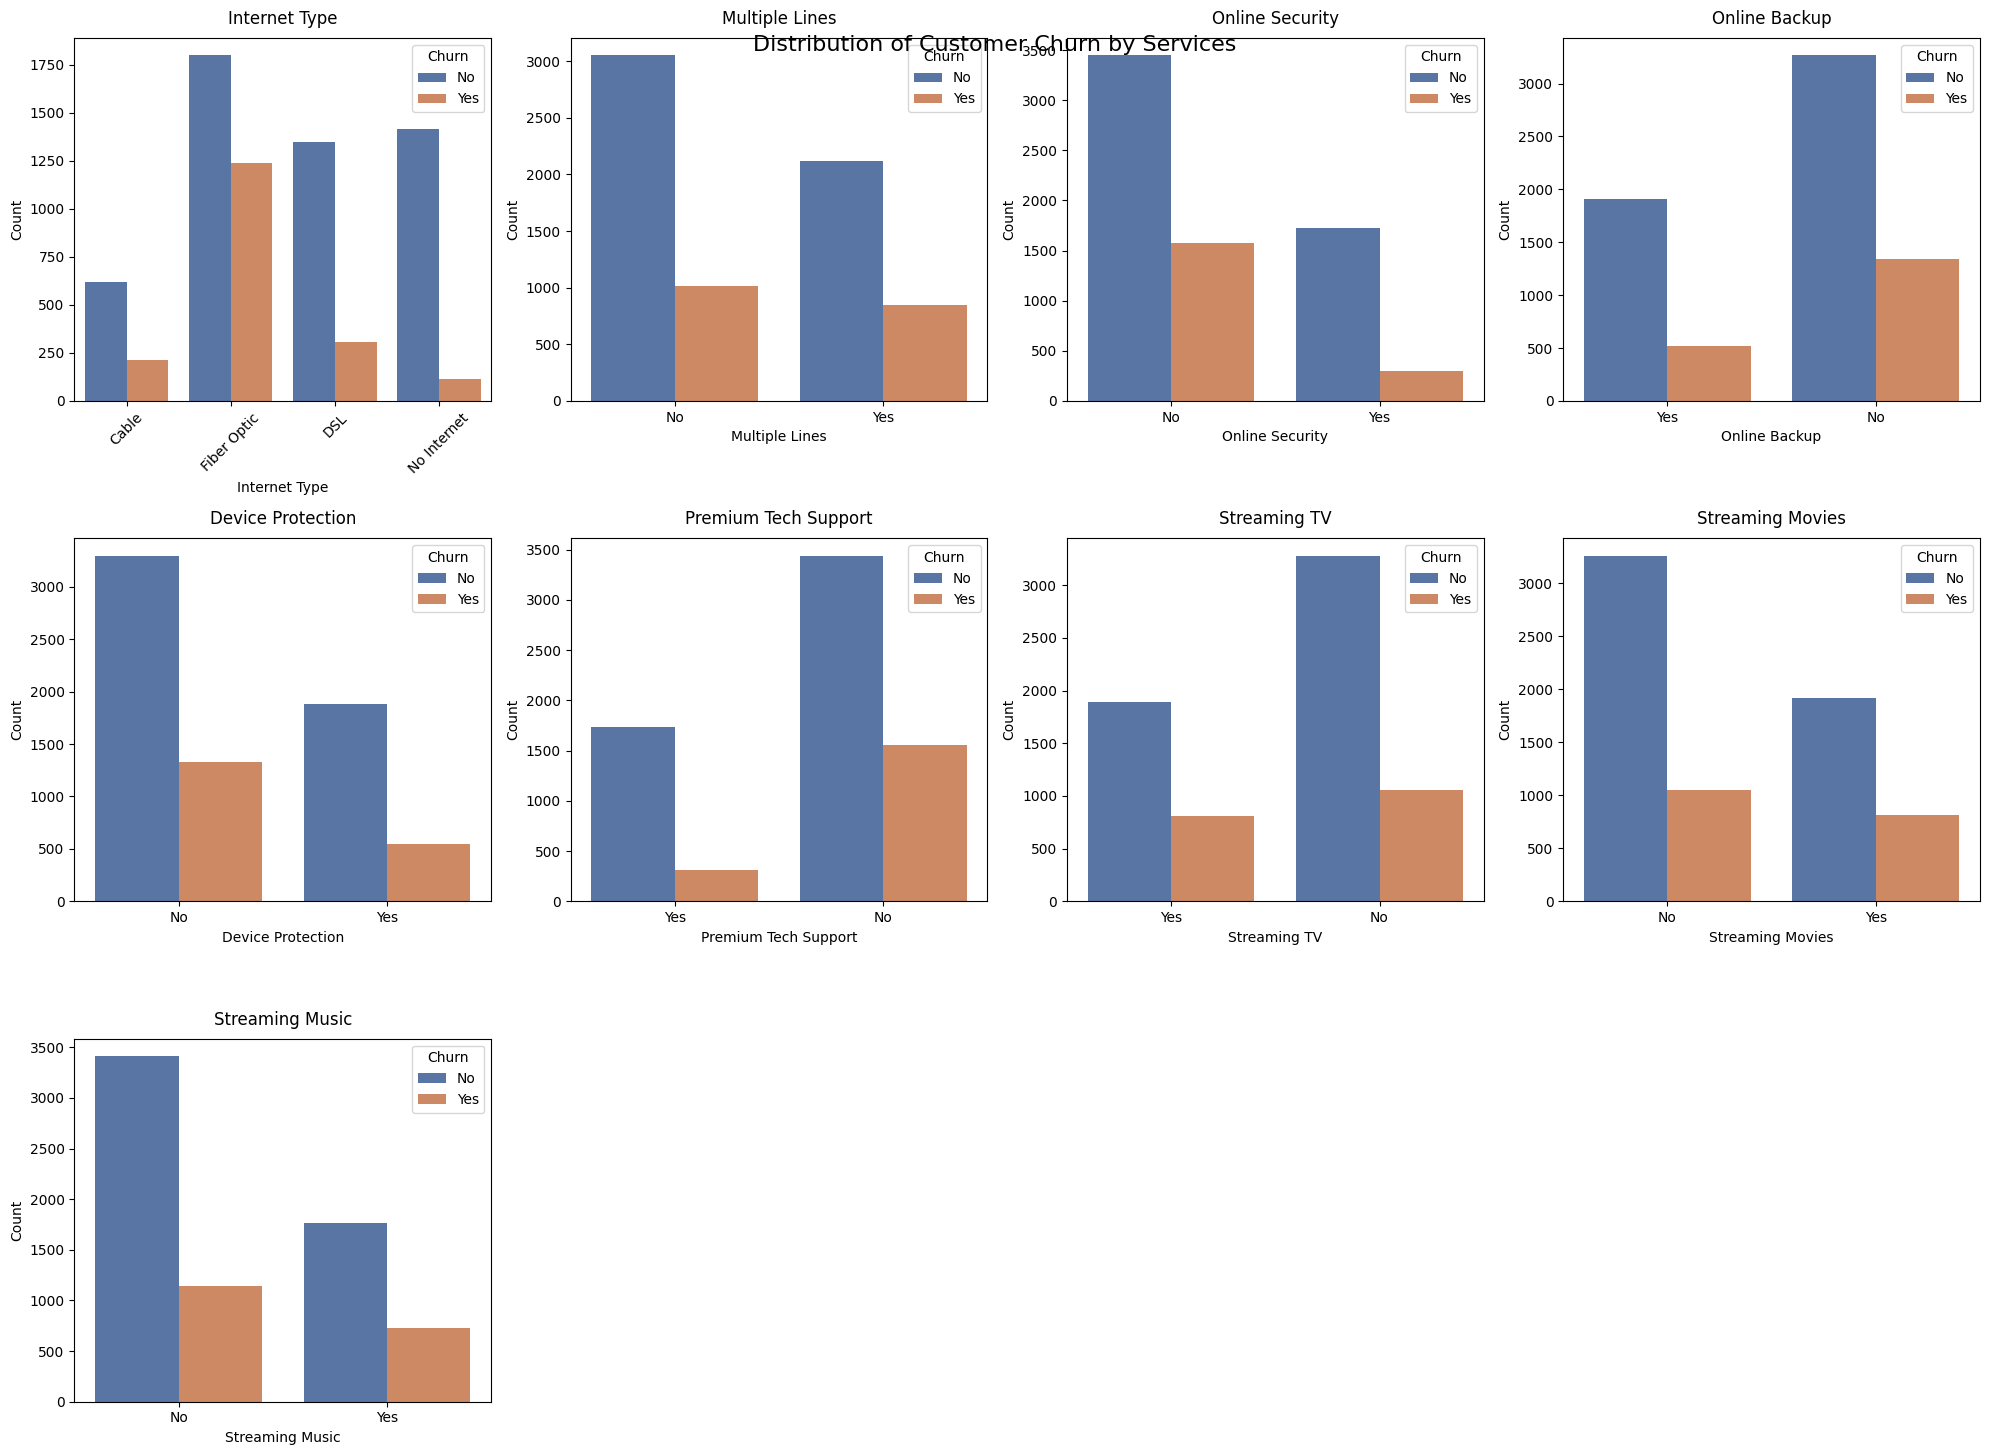

In [ ]:
plt.figure(figsize=(20, 15))

# Create subplot positions
n_plots = 10  # Total number of plots (9 features + 1 empty space)
n_cols = 4
n_rows = 3

# List of all features to plot
all_features = [
    ('internet_type', 'Internet Type', 45),  # (feature, title, rotation)
    ('multiple_lines', 'Multiple Lines', 0),
    ('online_security', 'Online Security', 0),
    ('online_backup', 'Online Backup', 0),
    ('device_protection', 'Device Protection', 0),
    ('premium_tech_support', 'Premium Tech Support', 0),
    ('streaming_tv', 'Streaming TV', 0),
    ('streaming_movies', 'Streaming Movies', 0),
    ('streaming_music', 'Streaming Music', 0)
]

# Plot each feature
for idx, (feature, title, rot) in enumerate(all_features):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.countplot(x=feature, hue='churn_value', data=df, palette='deep')
    plt.title(title, pad=10)
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    if rot > 0:
        plt.xticks(rotation=rot)

# Adjust layout
plt.title('Distribution of Customer Churn by Services', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

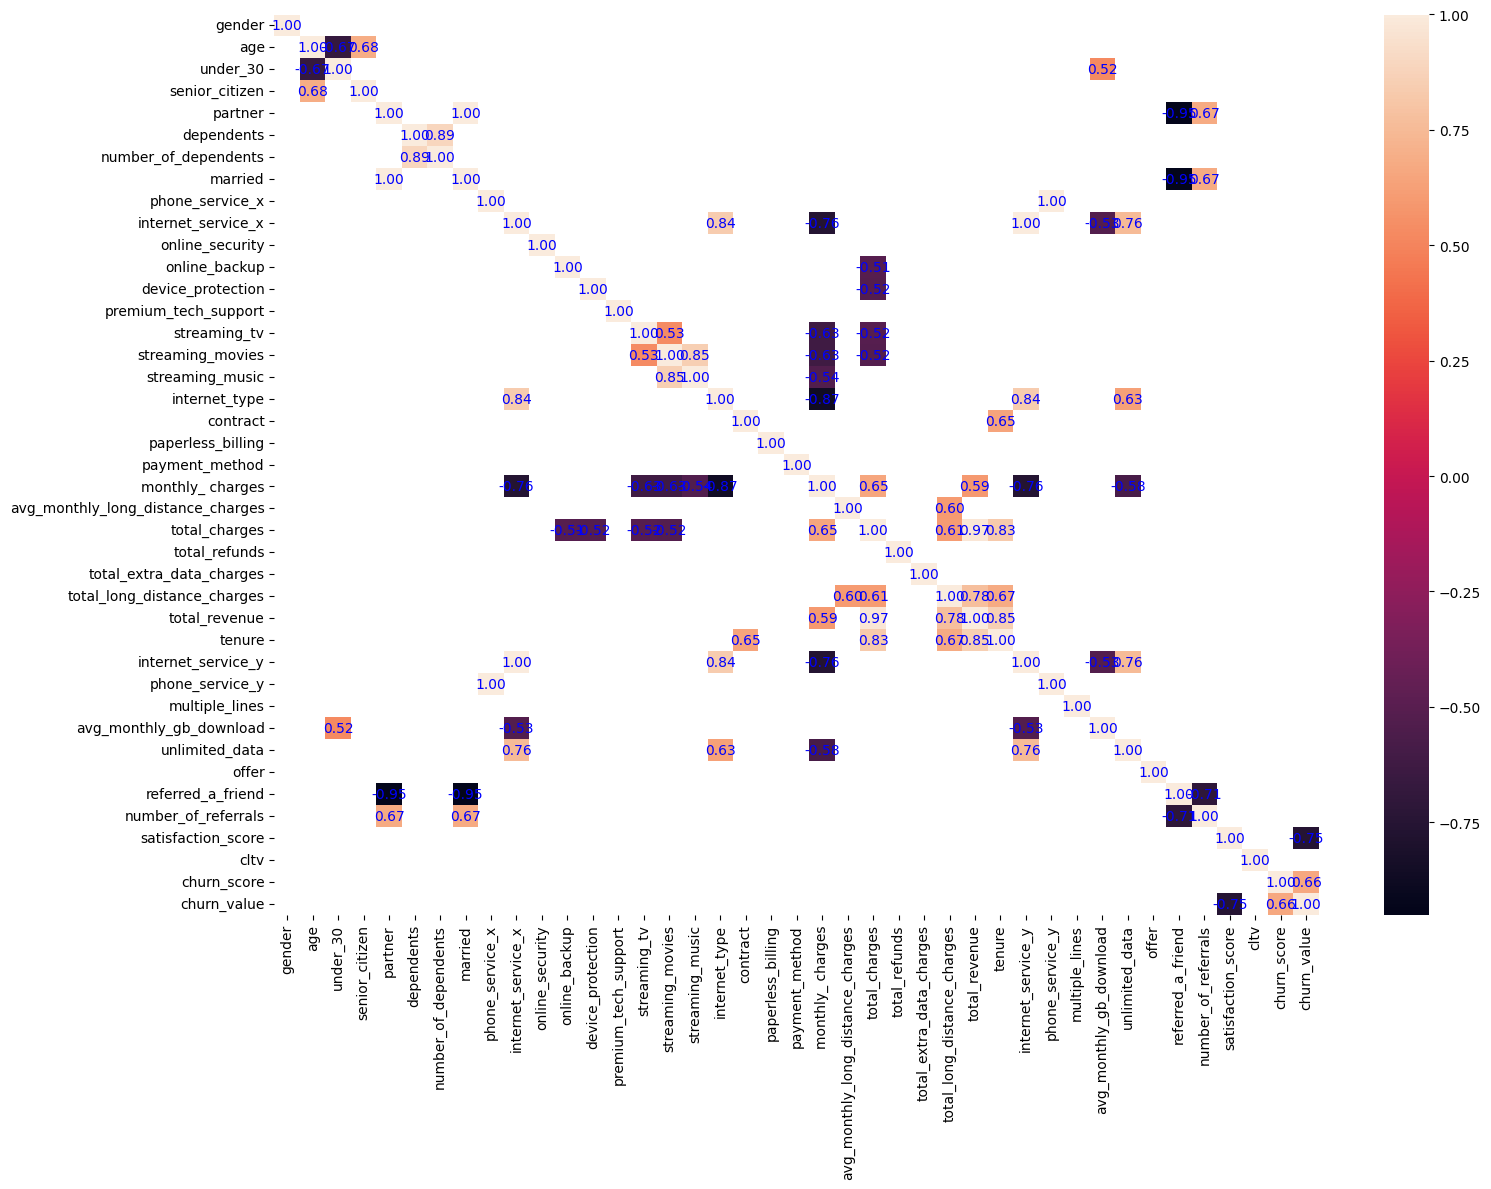

In [ ]:
# Create correlation matrix
corr = data.corr()

# Create a mask for values below 0.50 (absolute value)
mask = (abs(corr) < 0.50)

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask,
            annot_kws={"color": "blue"})
plt.tight_layout()
plt.show()

# Saving processed data for further analysis with PowerBI

In [ ]:
# df.to_csv('telco_churn.csv', index=False)